In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# plotly and cufflinks
import plotly.offline as py
import plotly.graph_objs as go
import cufflinks as cf
py.init_notebook_mode(connected=True)
cf.go_offline()

import xarray as xr

# Linear Difference Equations
based on James D. Hamilton

$\newcommand{\bm}[1]{\boldsymbol{#1}}$

## 2nd-order Difference Equation

Standard form:
$$y_t = \phi_1 y_{t-1} + \phi_2 y_{t-2} + w_t$$

### Vector Form
\begin{equation}
\bm{\xi}_t = \bm{F}\ \bm{\xi}_{t-1} + \bm{v_t}
\end{equation}
where
\begin{equation}
\bm{\xi}_t = 
\left[
\begin{array}{c}
y_t \\
y_{t-1}
\end{array}
\right],
\quad
\bm{F} = 
\left[
\begin{array}{cc}
\phi_1 & \phi_2 \\
1 & 0
\end{array}
\right],
\quad
\bm{v}_t = 
\left[
\begin{array}{c}
w_t \\
0
\end{array}
\right],
\end{equation}

### Using Lag Operator

$$(1 - \phi_1 L - \phi_2 L^2)y_t = w_t$$

### Eigenvalues:

$|F - \lambda I| = 0$ lead to 
$$\lambda^2 - \phi_1 \lambda - \phi_2 = 0$$

* Let $\lambda_1$ and $\lambda_2$ be eignevalues. Then, 
$$(\lambda - \lambda_1) (\lambda - \lambda_2) = 0$$
* Factorise the difference equation using the eigenvalues
$$(1 - \lambda_1 L)(1-\lambda_2 L) = w_t$$
* Not to be confused with $1- \phi_1 z - \phi_2 z^2 = 0$, obtained by replacing $L$ by $z$. $z$ and $\lambda$ are reciprocal each other:  
$$z = \lambda^{-1}$$

## Eigenvalue Diagram

* The dynamics of a 2nd-order difference equation can be summarised in terms of the eigenvalues as in the figure below. 
* The eigenvalues are district unless $\phi_1^2 + 4\phi^2 = 0$. 
* It is reproduction of Figure 1.5 of Hamilton. 

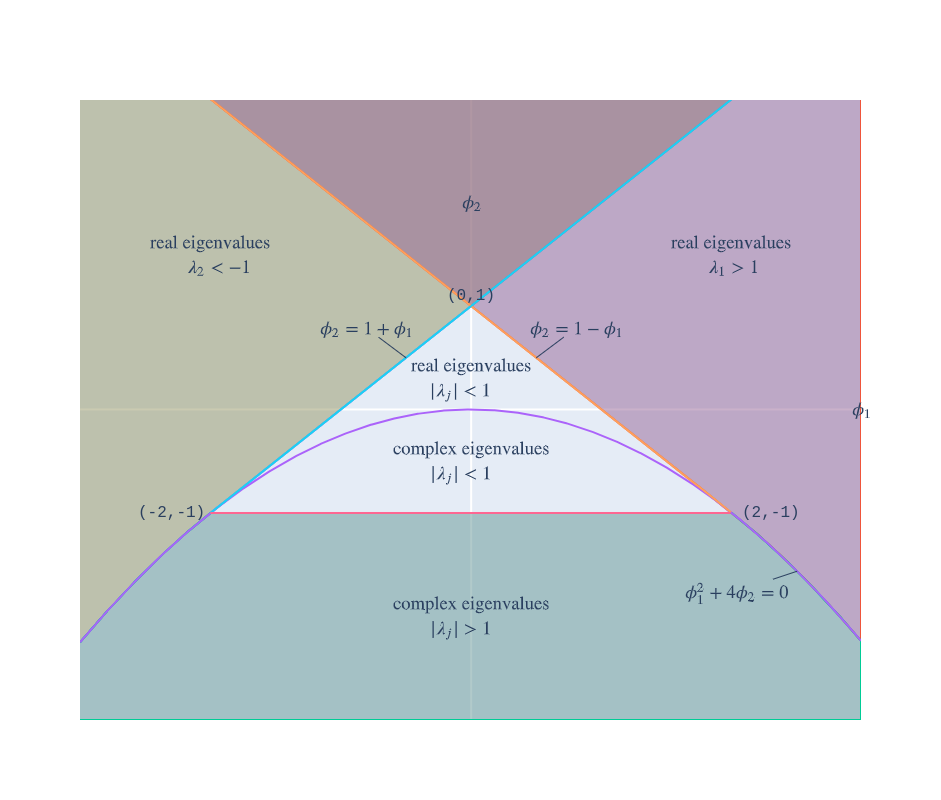

In [2]:
def fn_q(p):
    return -1.0/4*p**2

# basic variables
p_l = np.arange(-3,-2,0.01)
p_m = np.arange(-2,2,0.01)
p_r = np.arange(2,3,0.01)
p_lm = np.hstack((p_l,p_m))
p_mr = np.hstack((p_m,p_r))
p_lmr = np.hstack((p_l,p_m,p_r))

# plots
xrange = [np.min(p_lmr), np.max(p_lmr)]
yrange = xrange
pwidth = 800

ago = [] # collection of plots
ago.append(go.Scatter(x=np.hstack((p_l,p_mr,np.flip(p_lmr))),
                      y=np.hstack((fn_q(p_l),1+p_mr,3*np.ones(p_lmr.shape))),fill='toself',fillcolor='rgba(150,150,100,0.5)'))
ago.append(go.Scatter(x=np.hstack((p_lm,p_r,np.flip(p_lmr))),
                      y=np.hstack((1-p_lm,fn_q(p_r),3*np.ones(p_lmr.shape))),fill='toself',fillcolor='rgba(150,100,150,0.5)'))
ago.append(go.Scatter(x=np.hstack((p_l,p_m,p_r,np.flip(p_lmr))),
                      y=np.hstack((fn_q(p_l),-np.ones(p_m.shape),fn_q(p_r),-3*np.ones(p_lmr.shape))),fill='toself',fillcolor='rgba(100,150,150,0.5)'))
ago.append(go.Scatter(x=p_lmr, y=fn_q(p_lmr)))
ago.append(go.Scatter(x=p_lm, y=1.0 - p_lm))
ago.append(go.Scatter(x=p_mr, y=1.0 + p_mr))
ago.append(go.Scatter(x=p_m, y=-np.ones(p_m.shape)))

annotations=[
    dict(x=-2.3,y=-1,text=r'(-2,-1)',showarrow=False),
    dict(x=+2.3,y=-1,text=r'(2,-1)',showarrow=False),
    dict(x=0,y=1.1,text=r'(0,1)',showarrow=False),
    dict(x=0.5,y=0.5,text=r'$\phi_2=1-\phi_1$',ax=40),
    dict(x=-0.5,y=0.5,text=r'$\phi_2=1+\phi_1$',ax=-40),
    dict(x=2.5,y=-2.5**2/4,text=r'$\phi_1^2+4\phi_2=0$', ax=-60, ay=20),
    dict(x=-2,y=1.5,text=r'$\text{real eigenvalues}\\ \quad\quad\lambda_2<-1\\$',showarrow=False),
    dict(x=2,y=1.5,text=r'$\text{real eigenvalues}\\ \quad\quad\lambda_1>1\\$',showarrow=False),
    dict(x=0,y=0.3,text=r'$\text{real eigenvalues}\\ \quad|\lambda_j|<1\\$',showarrow=False),
    dict(x=0,y=-0.5,text=r'$\text{complex eigenvalues}\\ \quad\quad|\lambda_j|<1\\$',showarrow=False),
    dict(x=0,y=-2,text=r'$\text{complex eigenvalues}\\ \quad\quad|\lambda_j|>1\\$',showarrow=False),
    dict(x=xrange[1],y=0,text=r'$\phi_1$',showarrow=False),
    dict(x=0,y=2,text=r'$\phi_2$',showarrow=False),
]

# update with selected font
[d.update(dict(font=dict(family='Courier New, monospace', size=16))) for d in annotations]

# layout and plot
layout = go.Layout(height=pwidth, width=pwidth, 
                   xaxis=dict(range=xrange,showgrid=False, showticklabels=False), 
                   yaxis=dict(range=yrange,showgrid=False, showticklabels=False), 
                   annotations=annotations,
                   showlegend=False, 
                   hovermode=False)
py.iplot(go.Figure(data=ago, layout=layout))

# Autoregressive Processes

## AR(1)
\begin{equation}
Y_t = c + \phi Y_{t-1} + \sigma \epsilon_t
\end{equation}

In [3]:
def fn_ar1(c,phi,sigma,y0, eps1):
    return c + phi * y0 + sigma * eps1

c = 0.1
phi = 0.99
sigma = 0.1

n_scen = 10
dim_scen = 'scen'
y0 = 0.0
dim_t = 't'
n_t = 100

aY = [y0 * xr.DataArray(np.ones(n_path), dims=(dim_scen))]
for n in range(n_t):
    y0 = aY[-1]
    eps1 = xr.DataArray(np.random.normal(0.0, 1.0, n_path), dims=(dim_scen))
    y1 = fn_ar1(c, phi, sigma, y0, eps1)
    aY.append(y1)

T = xr.DataArray(np.arange(0,n_t+1), dims=(dim_t))
Y = xr.concat(aY, dim=(dim_t))


    
    
    

NameError: name 'n_path' is not defined

In [ ]:
[x for x in Y.get_index(dim_scen)]

In [ ]:
Y[dict(scen=0)]